# Primera aproximación :)

Vamos a tratar de visualizar el espectrograma de algunos de los audios. 

Seguimos código de este link: https://pythontic.com/visualization/signals/spectrogram

In [3]:
from matplotlib import pyplot as plt
from scipy.io import wavfile

In [4]:
samplingFrequency, signalData = wavfile.read(
    '../audio/COMECHINGONES_02.wav')

Text(0, 0.5, 'Frequency')

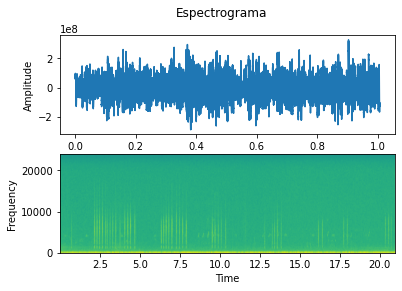

In [14]:
fig,ax = plt.subplots(2,1)
plt.suptitle('Espectrograma')

ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')
ax[0].plot(signalData)

ax[1].specgram(signalData,Fs=samplingFrequency)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')

Uno de los papers que tenemos en el repo:
>Sprengel, E., Jaggi, M., Kilcher, Y., & Hofmann, T. (2016). Audio based bird species identification using deep learning techniques (No. CONF, pp. 547-559).

Acá hay un método para extraer las features de un audio, con un protocolo basado en la estadística de las muestras obtenidas luego de aplicar la SFFT. 

In [18]:
from scipy.signal import stft

In [36]:
f,t,Zxx = stft(signalData,samplingFrequency,window='hamming')

In [ ]:
Zxx_norm = np.abs(Zxx)/np.abs(Zxx).max()

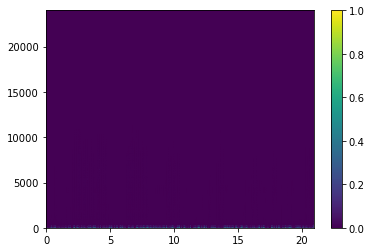

In [55]:
plt.pcolormesh(t, f, Zxx_norm,vmin=0, shading='gouraud')
plt.colorbar()

In [60]:
row_median,column_median = np.median(Zxx_norm,axis=0),np.median(Zxx_norm,axis=1)

In [86]:
(Zxx_norm.T > 3*column_median)

array([[False, False,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True]])